<a href="https://colab.research.google.com/github/Abdi-dotcom/Principles-of-Data-Science/blob/main/california_housing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
california = pd.concat([X, y], axis=1)

In [2]:
california.head(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
5    -122.25        2.697  
6    -122.25        2.992  
7    -122.25        2.414  
8    -122.26        2.267  
9    -122.25        2.611

In [97]:
california.shape

(20640, 9)

In [100]:
#check missing values
california.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [101]:
#check duplicate rows
california.duplicated().sum()

np.int64(0)

In [102]:
#check column types
california.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

## Making Sense of the Data: Visualising Distributions and Relationships

In [110]:
california.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

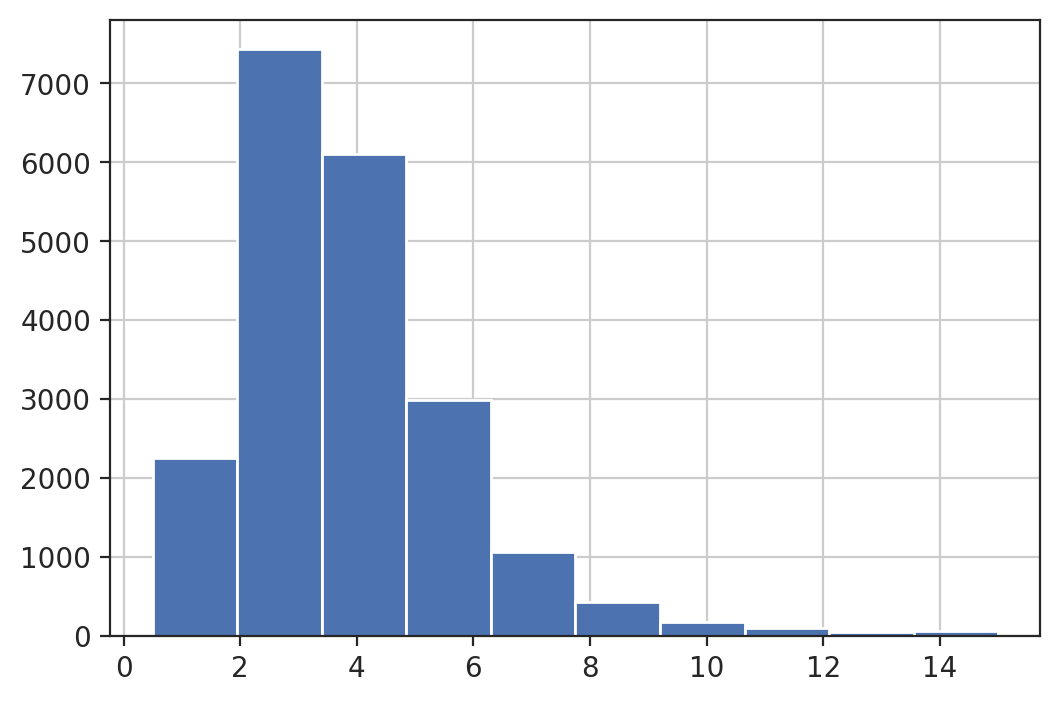

In [109]:
california.MedInc.hist();

<Axes: >

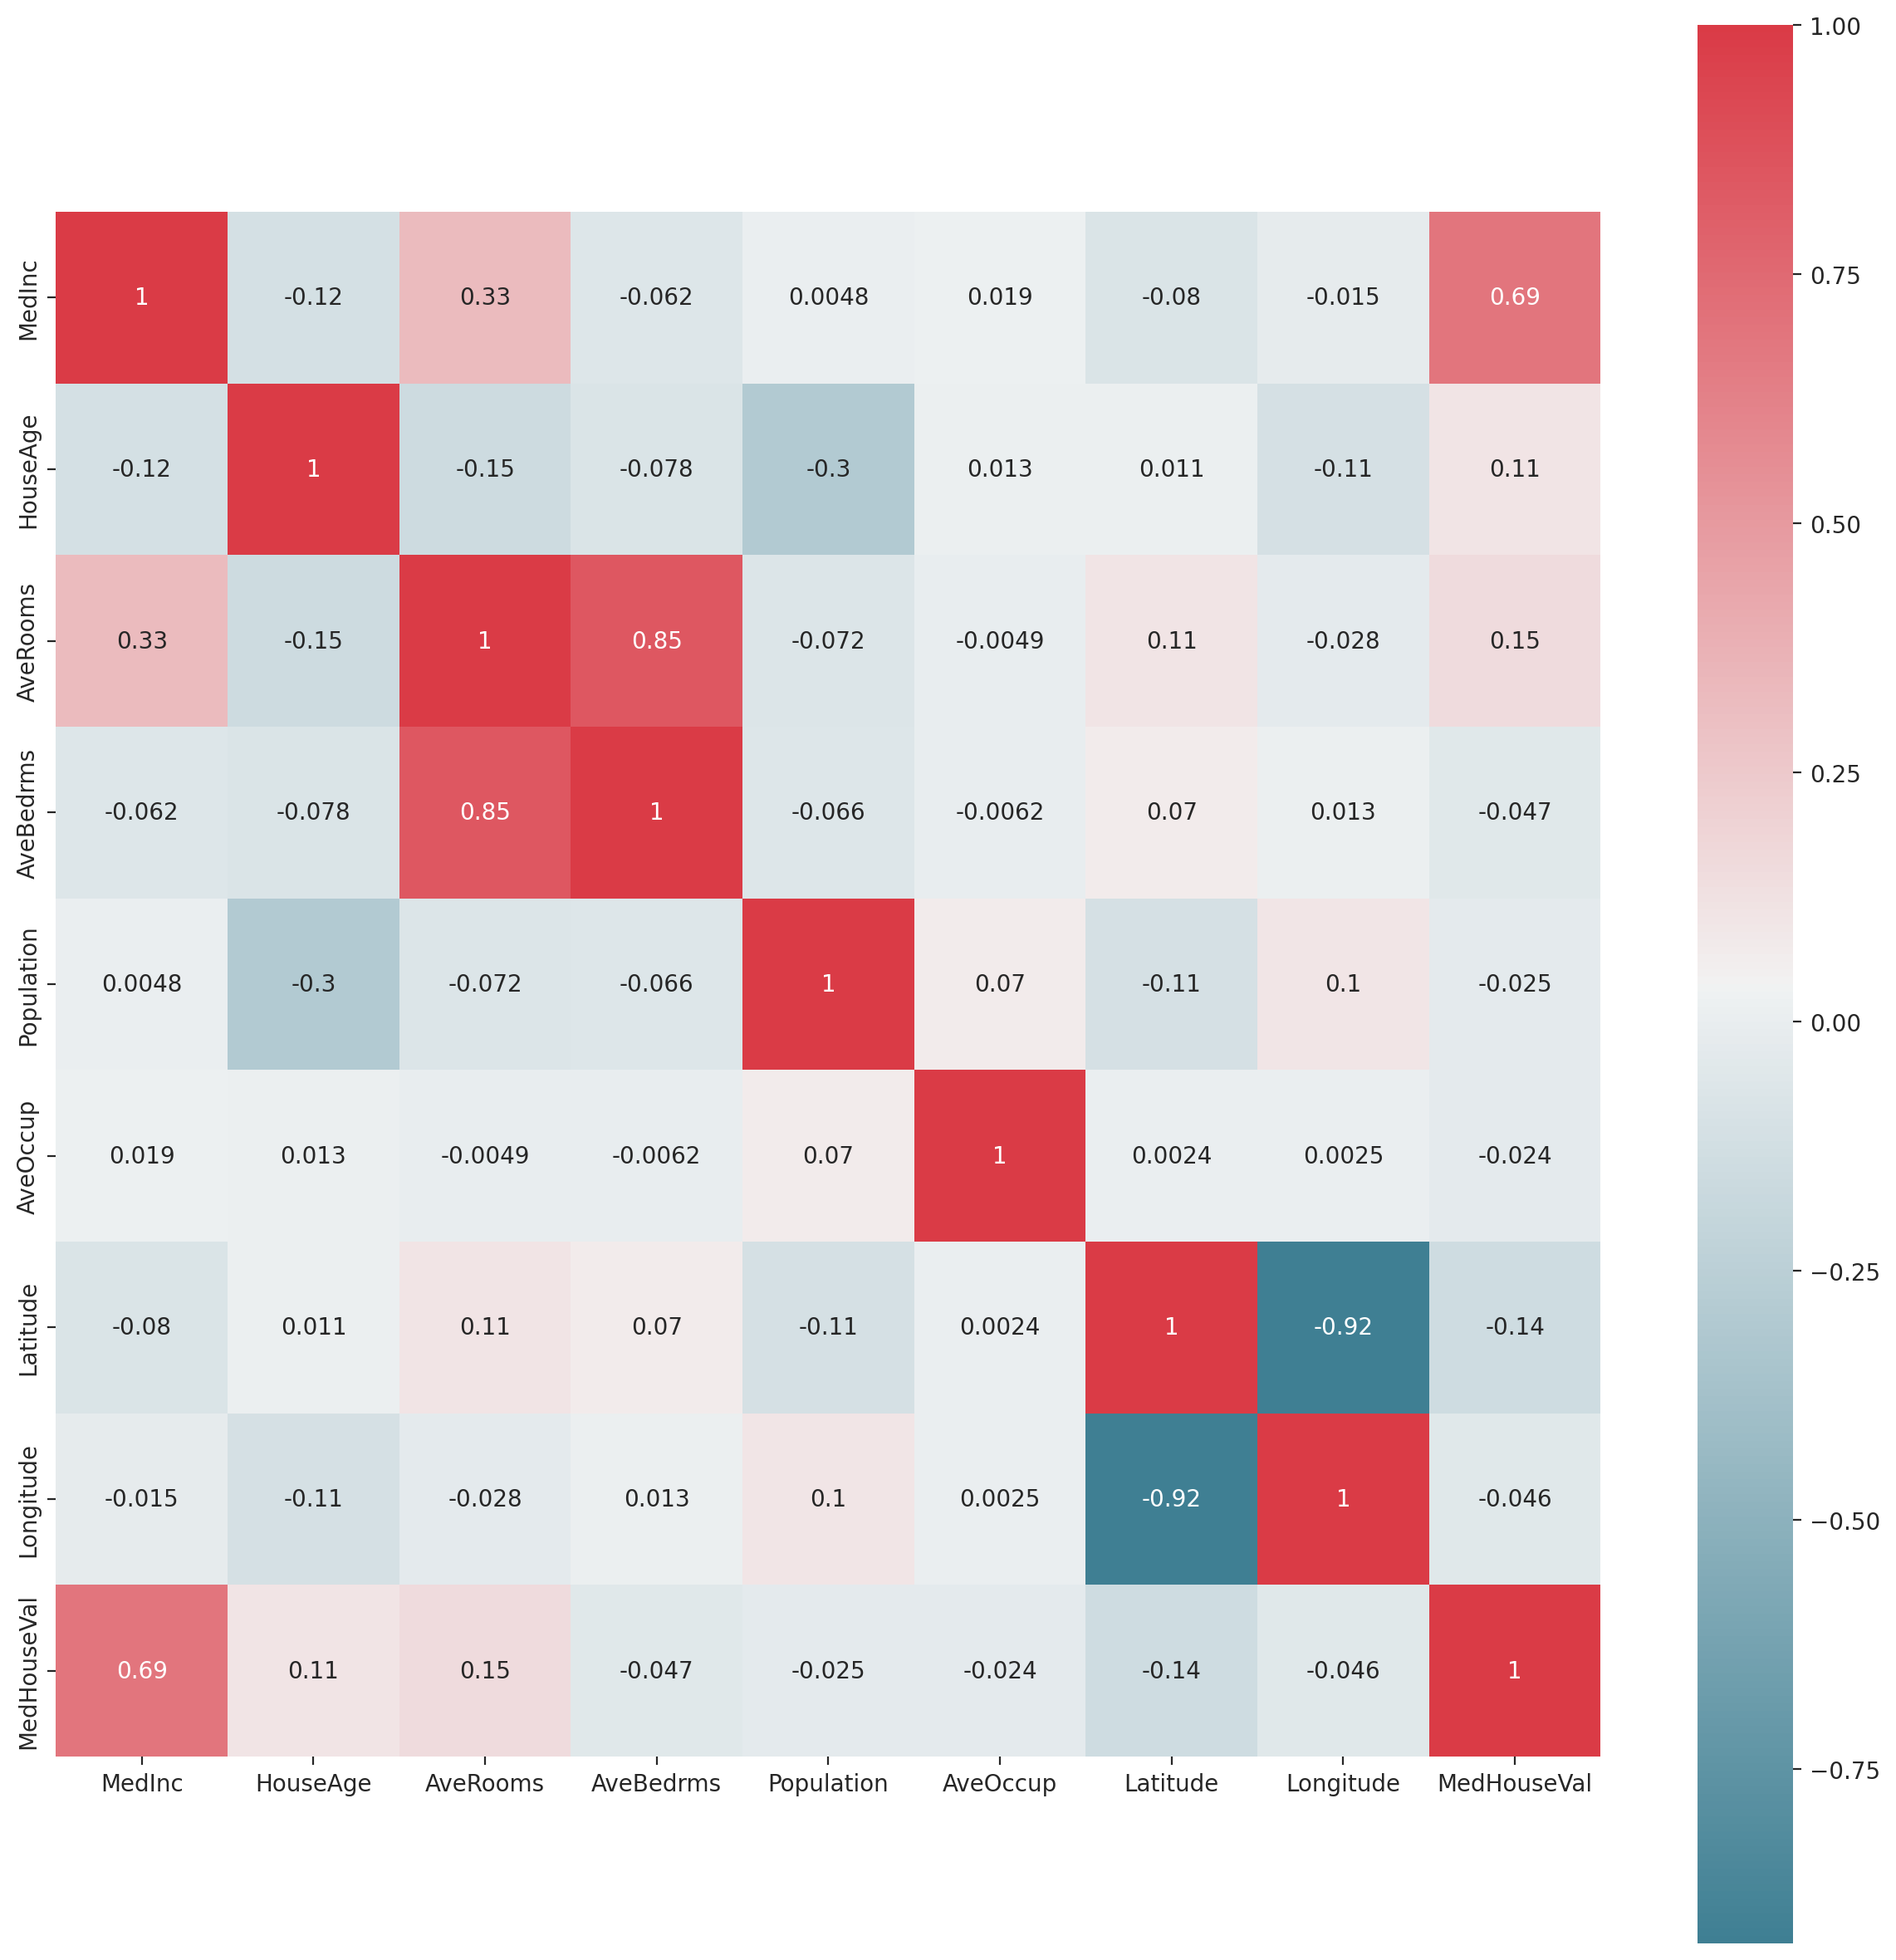

In [104]:
f, ax = plt.subplots(figsize=(15, 15))
corr = california.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

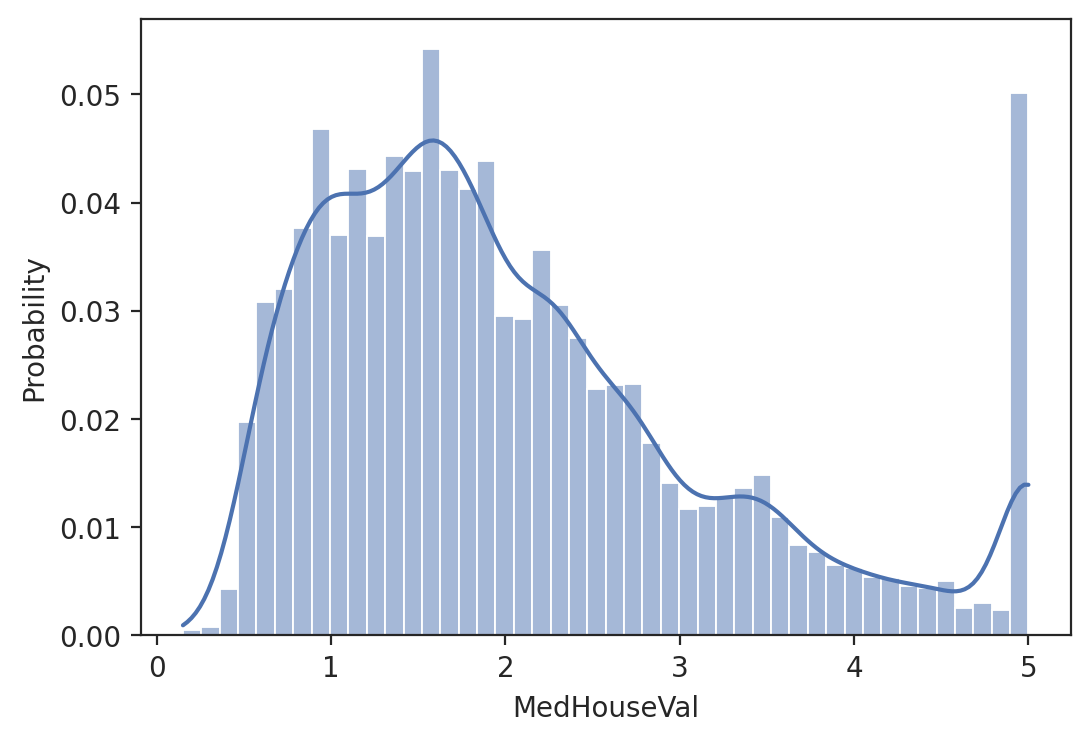

In [3]:
sns.histplot(data=california, x='MedHouseVal', kde=True, stat='probability');

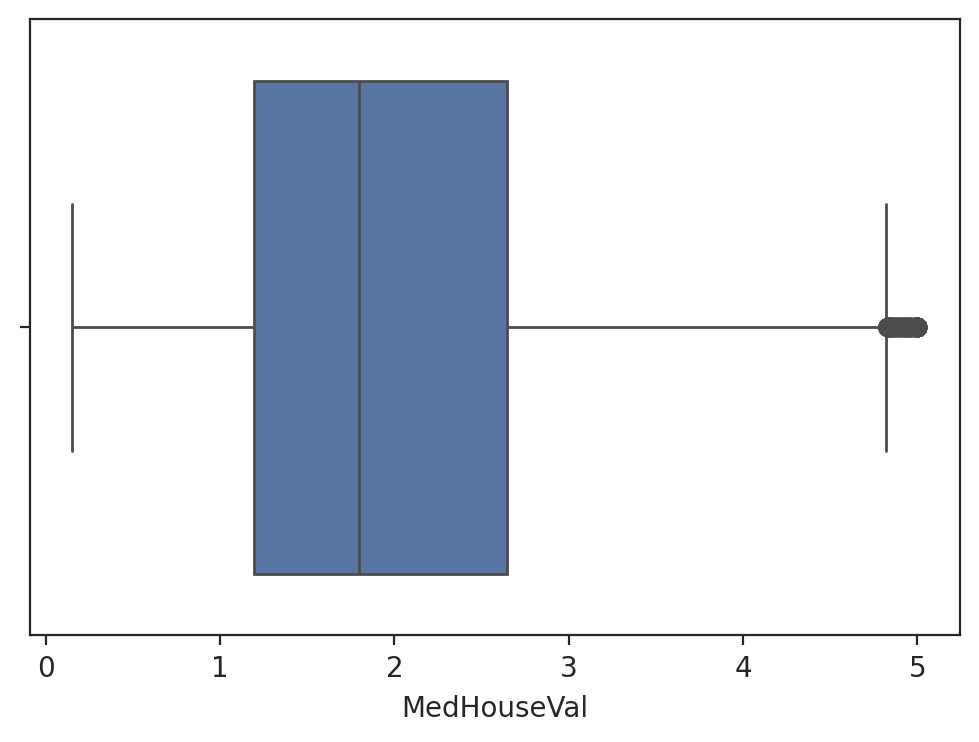

In [4]:
sns.boxplot(data=california, x='MedHouseVal');

Based on the histogram and boxplot, the distribution of median house values (MedHouseVal) in the California housing dataset is skewed to the right, meaning there are more houses with lower median values and fewer houses with higher median values. The boxplot further illustrates this skewness and shows the presence of outliers, which are houses with significantly higher median values than the majority of the data. This indicates that while most houses have median values clustered in a lower range, there are a notable number of properties with much higher values.

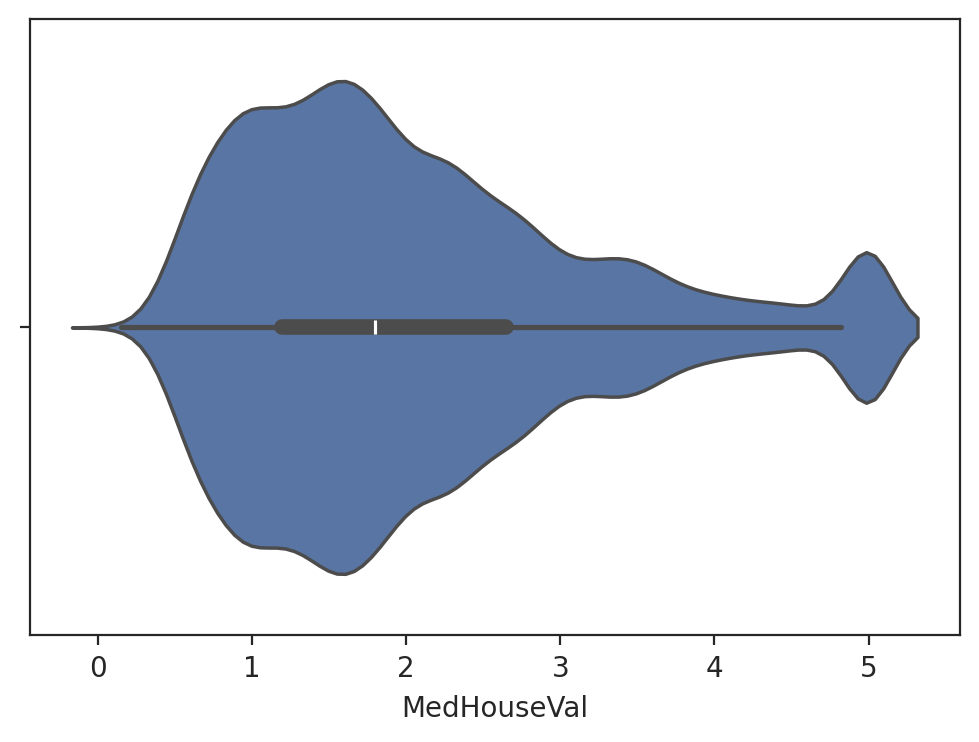

In [5]:
sns.violinplot(data=california, x='MedHouseVal');

### Feature/Target Relationships

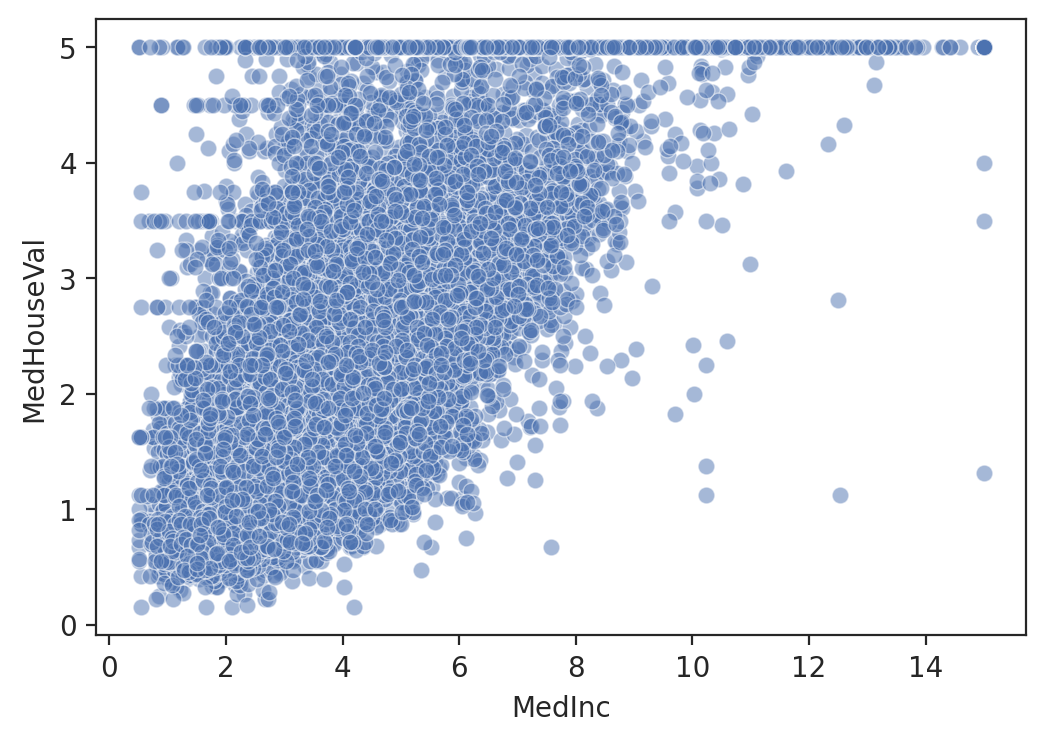

In [9]:
sns.scatterplot(data=california, x='MedInc', y='MedHouseVal', alpha=0.5);

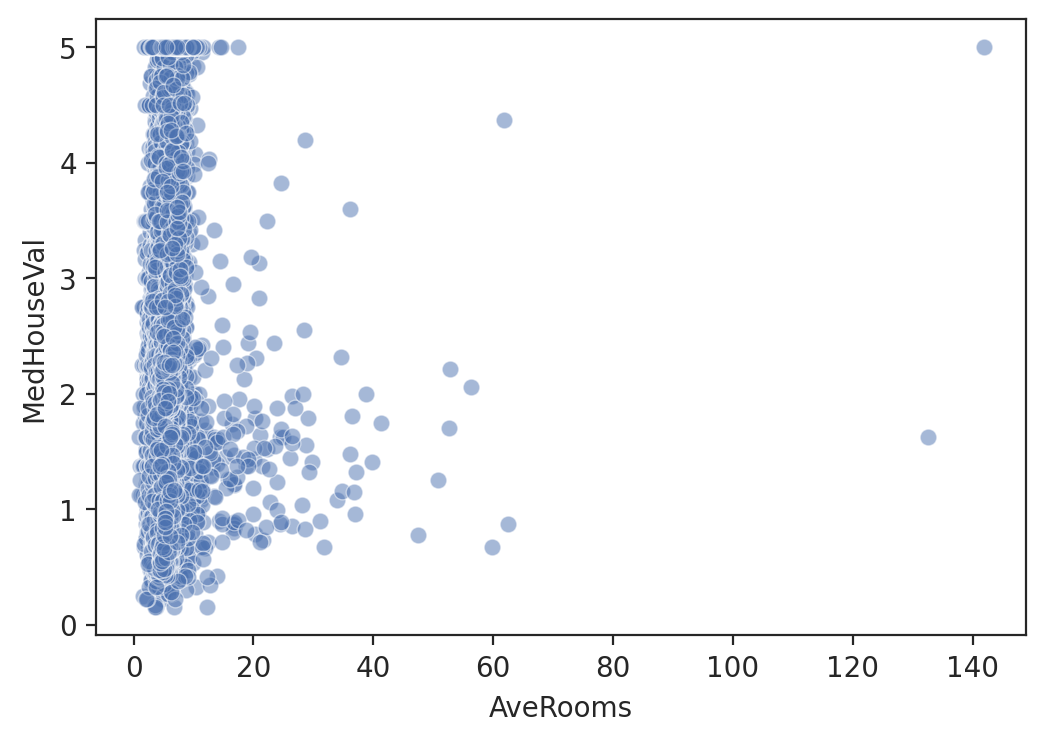

In [10]:
sns.scatterplot(data=california, x='AveRooms', y='MedHouseVal', alpha=0.5);

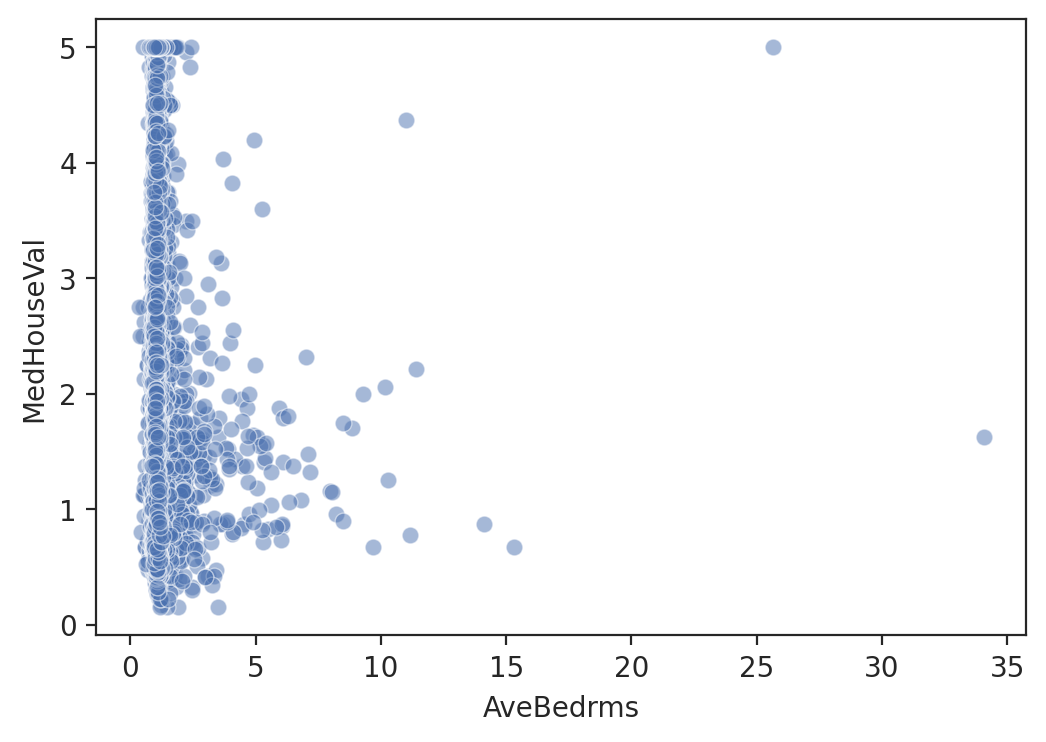

In [11]:
sns.scatterplot(data=california, x='AveBedrms', y='MedHouseVal', alpha=0.5);


Lets see a visualisation of subplot options showing how different features relate to Median House Value.

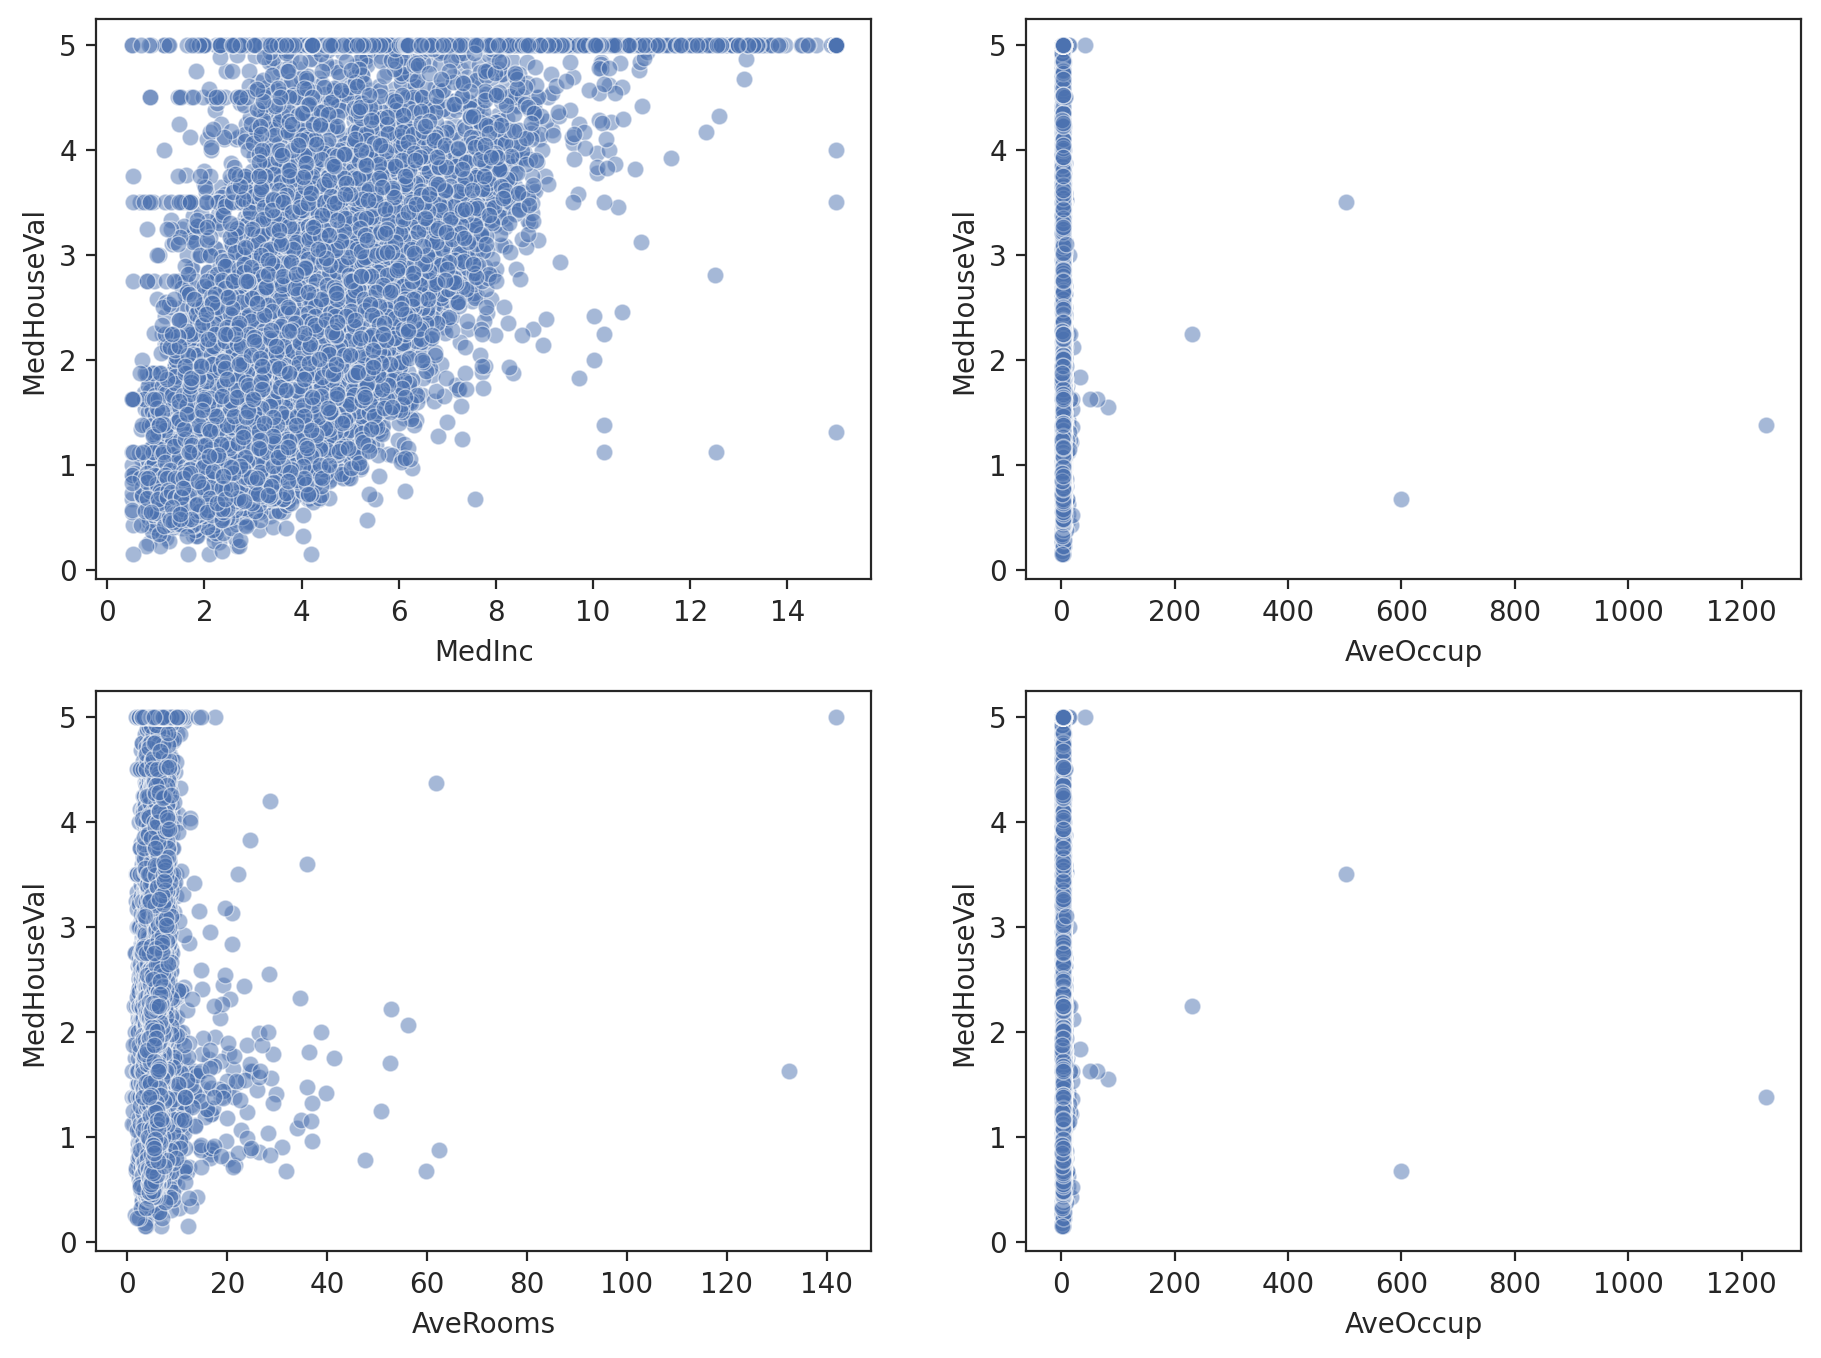

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

sns.scatterplot(data=california, x='MedInc', y='MedHouseVal', alpha=0.5, ax=axs[0, 0])
sns.scatterplot(data=california, x='AveOccup', y='MedHouseVal', alpha=0.5, ax=axs[0, 1])
sns.scatterplot(data=california, x='AveRooms', y='MedHouseVal', alpha=0.5, ax=axs[1, 0])
sns.scatterplot(data=california, x='AveOccup', y='MedHouseVal', alpha=0.5, ax=axs[1, 1]);

## A First kNN Regression Model

The X/y split

In [29]:
X = california.drop(columns='MedHouseVal')
y = california['MedHouseVal']

### The Train/Test Split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

What does a KNN Regressor consist of?

 A kNN classifier takes the majority class of the neighbours as a prediction, a KNN regressor produces the average value (mean) of the target from the neighbours (medhouseval).


In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
knnr=  KNeighborsRegressor(n_neighbors=11)

In [39]:
 knnr.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=11)

In [65]:
a_linear_test_set = pd.DataFrame(np.linspace(y.min(), y.max(), 500), columns=['MedHouseVal'])

In [45]:
a_linear_test_set.head()

MedHouseVal
0     0.149990
1     0.159709
2     0.169429
3     0.179148
4     0.188868

<Axes: xlabel='MedHouseVal'>

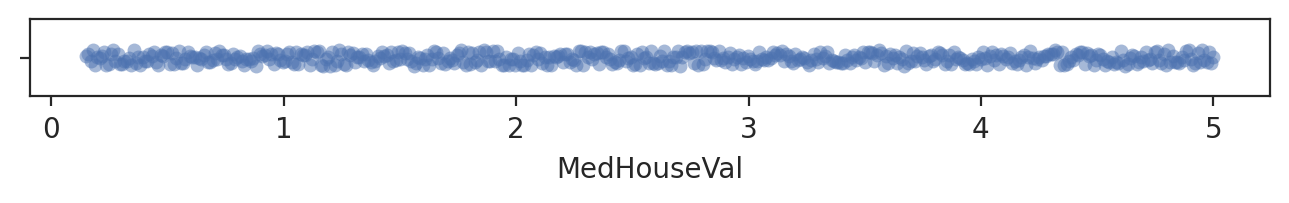

In [64]:
fig, ax = plt.subplots(figsize=(8, 0.5))
sns.stripplot(data=a_linear_test_set, x='MedHouseVal', alpha=0.5, legend=False, ax=ax)

In [58]:
y_pred = knnr.predict(X_test_scaled)

In [56]:
y_pred[:24]

array([1.47972727, 2.56881818, 1.41327273, 0.68063636, 2.94363636,
       1.75936364, 3.15781818, 3.17463636, 2.90045455, 2.44690909,
       2.15109091, 0.80836364, 0.97818182, 2.40627364, 1.85427273,
       2.74181818, 3.47291   , 2.24081818, 1.36209091, 3.74136545,
       1.44381818, 0.64      , 2.48054545, 2.54427273])

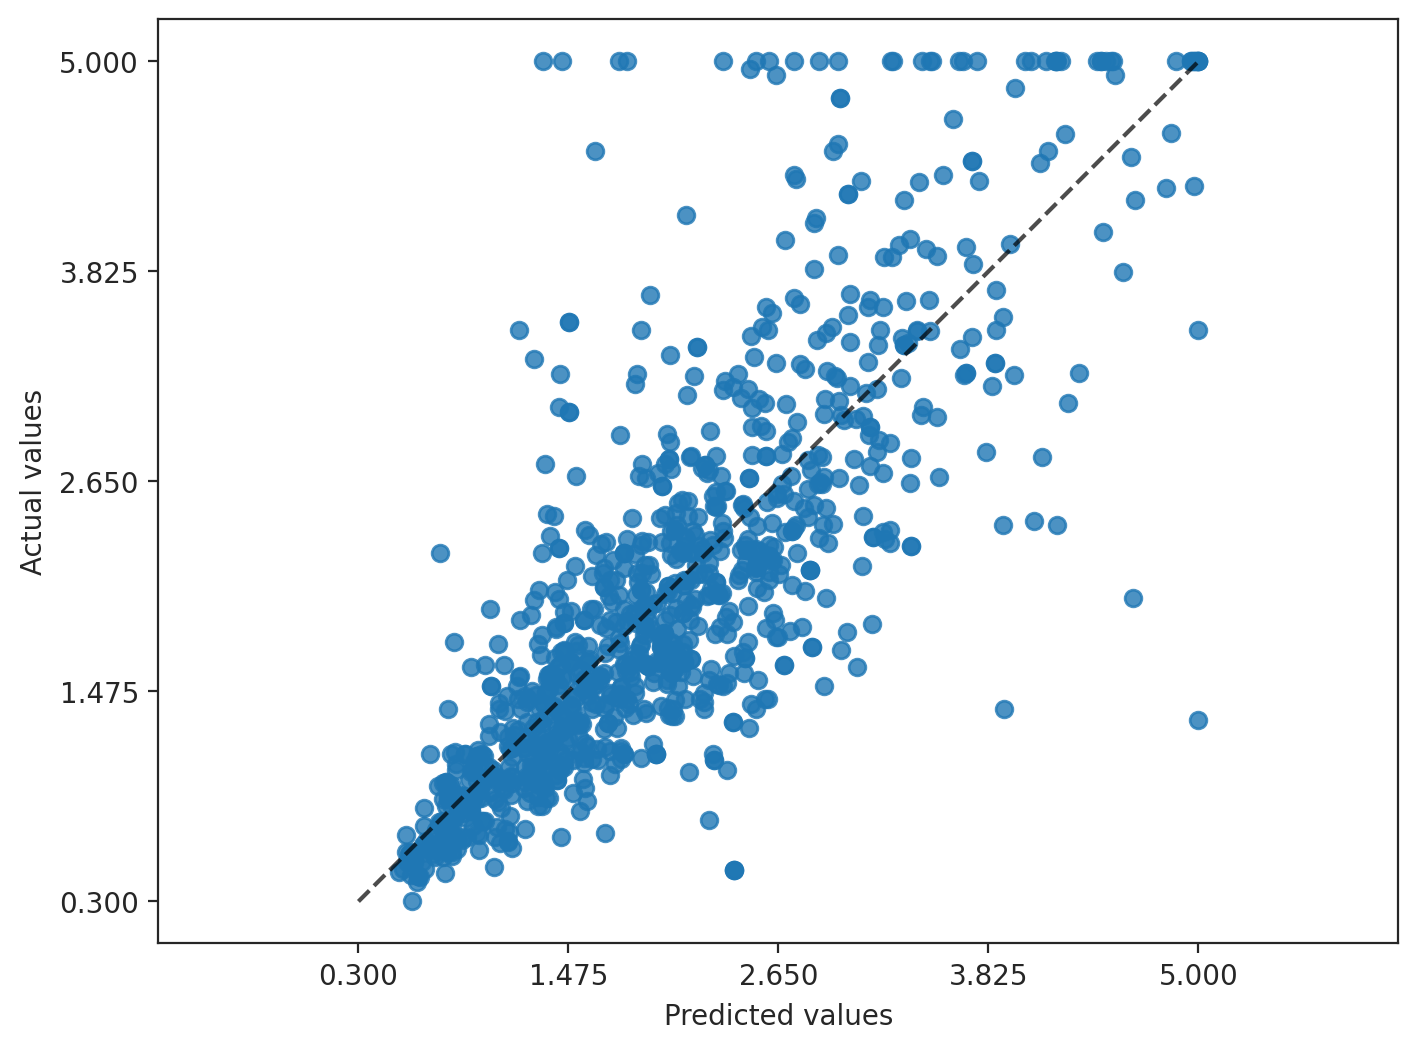

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
PredictionErrorDisplay.from_estimator(knnr, X_test_scaled, y_test, kind='actual_vs_predicted', ax=ax)

Data Transformation for for ML(data scaling)

scaling the predictor for exmple MinMax

Why? In the context of kNN, features with values measured in different scales will affect distances differently (something in 1000s will have much larger impact on distance when compare to another measure in 10s).


In [67]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_scaled[:5]

array([[0.53966842, 0.78431373, 0.0435123 , 0.02046866, 0.00894083,
        0.00149943, 0.5674814 , 0.21115538],
       [0.53802706, 0.39215686, 0.03822395, 0.01892926, 0.0672104 ,
        0.00114074, 0.565356  , 0.21215139],
       [0.46602805, 1.        , 0.05275646, 0.02194011, 0.01381765,
        0.00169796, 0.5642933 , 0.21015936],
       [0.35469856, 1.        , 0.03524099, 0.02192864, 0.01555537,
        0.0014933 , 0.5642933 , 0.20916335],
       [0.23077613, 1.        , 0.03853386, 0.02216644, 0.01575156,
        0.00119838, 0.5642933 , 0.20916335]])

In [69]:
X_scaled_df = pd.DataFrame(
    X_scaled, columns=X.columns
)

In [70]:
X_scaled_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  
0   0.211155  
1   0.212151  
2   0.210159  
3   0.209163  
4   0.209163

In [71]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [72]:
X_scaled_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       0.232464      0.541951      0.032488      0.022629      0.039869   
std        0.131020      0.246776      0.017539      0.014049      0.031740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.142308      0.333333      0.025482      0.019943      0.021974   
50%        0.209301      0.549020      0.031071      0.021209      0.032596   
75%        0.292641      0.705882      0.036907      0.022713      0.048264   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       0.001914      0.328572      0.476125  
std        0.008358      0.226988      0.199555  
min        0.000000      0.000000      0.000000  
25%        0.001398      0.147715      0.253984  
50%        0.001711      0.182784      0.583665  
75%        0.002084      0.549416      0.631474  
max        1.000000      1.000000      1.000000

In [74]:
X.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

Model Fitting

In [75]:
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Model Evaluation

### Aggregate Score/Loss

The score; the higher the better for loss; the lower the better

In [76]:
knnr.score(X_train, y_train), knnr.score(X_test, y_test)

(1.0, -0.20973363295088965)

In [77]:
from sklearn.metrics import mean_absolute_error

In [79]:
mean_absolute_error(y_train, knnr.predict(X_train))

0.0

In [80]:
mean_absolute_error(y_test, knnr.predict(X_test))

0.9381418934108527

Residuals

In [82]:
y_test.iloc[0]

np.float64(1.369)

In [85]:
knnr.predict(X_test.iloc[[0]])

array([0.705])

In [86]:
y_pred = knnr.predict(X_test)

In [87]:
y_test.head().to_numpy()

array([1.369, 2.413, 2.007, 0.725, 4.6  ])

In [88]:
y_pred[:5]

array([0.705, 3.927, 3.263, 0.902, 1.594])

In [89]:
(y_pred - y_test).head()

14740   -0.664
10101    1.514
20566    1.256
2670     0.177
15709   -3.006
Name: MedHouseVal, dtype: float64

In [90]:
# mean absolute error: take the average of the absolute values of the residuals (only the magnitude matters)
np.mean(np.abs(y_pred - y_test))

np.float64(0.9381418934108527)

## Model Analysis

### Actual vs Predicted

In [91]:
def plot_actual_vs_predicted_joint(est, X, y):

    g = sns.jointplot(x=y, y=est.predict(X), alpha=0.5)
    # for the diagonal of correct predictions, need the lower-left and upper-right limits
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [min(x0, y0), max(x1, y1)]
    g.ax_joint.set(xlim=lims, ylim=lims)
    g.ax_joint.plot(lims, lims, ':k', alpha=0.3, lw=1);
    g.ax_joint.set(xlabel='True Target Value')
    g.ax_joint.set(ylabel='Predicted Target Value')

    return g, g.ax_joint

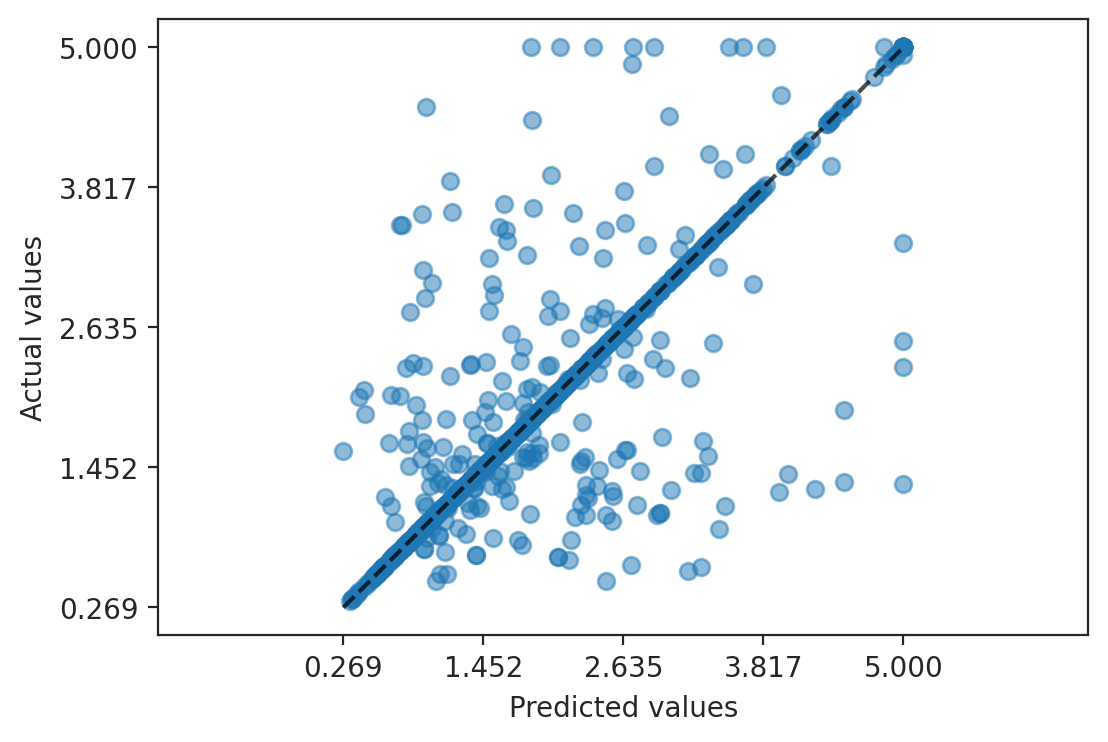

In [92]:
PredictionErrorDisplay.from_estimator(
    knnr, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

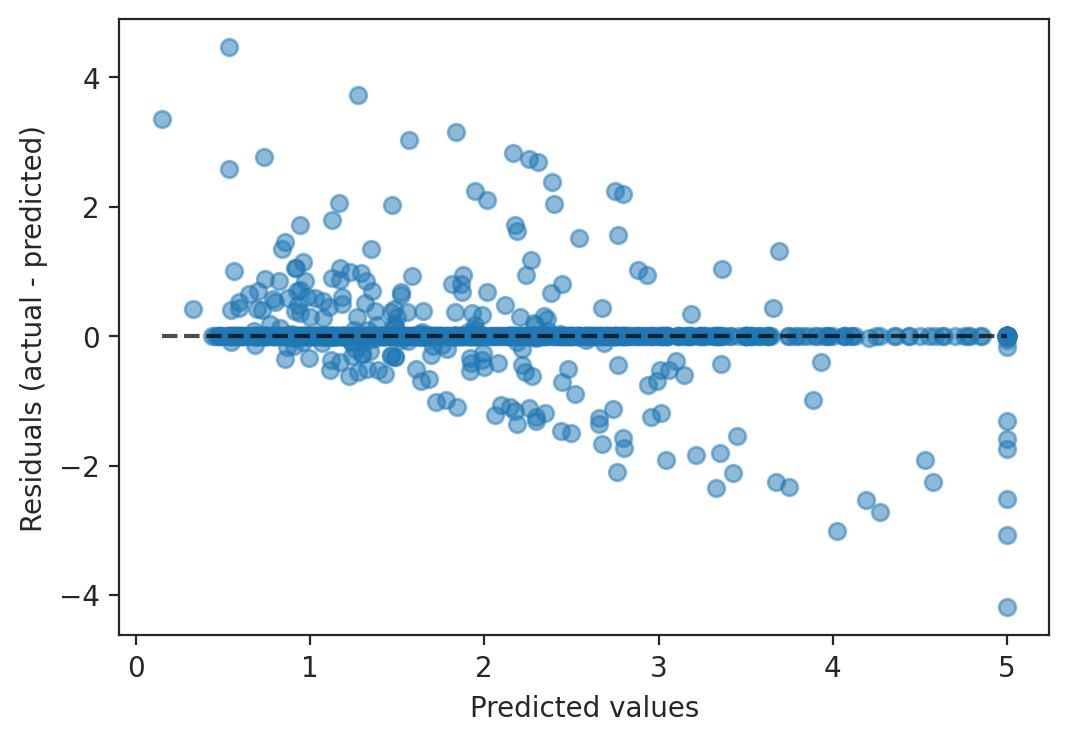

In [93]:
PredictionErrorDisplay.from_estimator(
    knnr, X, y, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [94]:
residuals = knnr.predict(X) - y

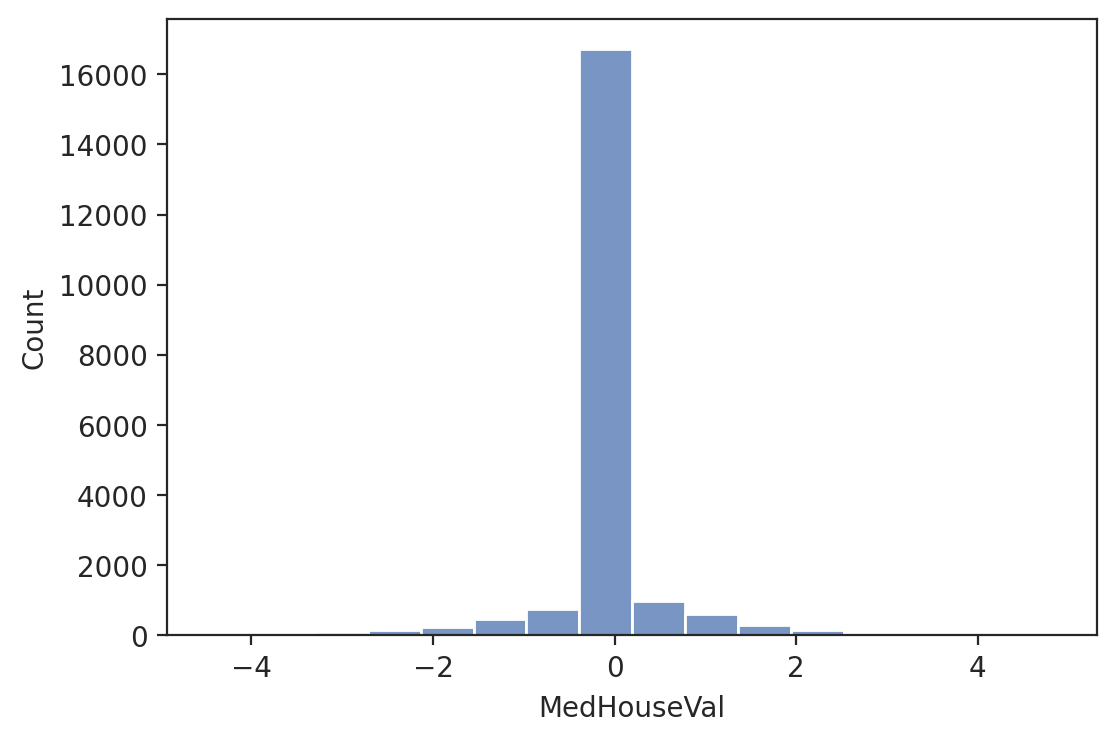

In [95]:
sns.histplot(residuals);

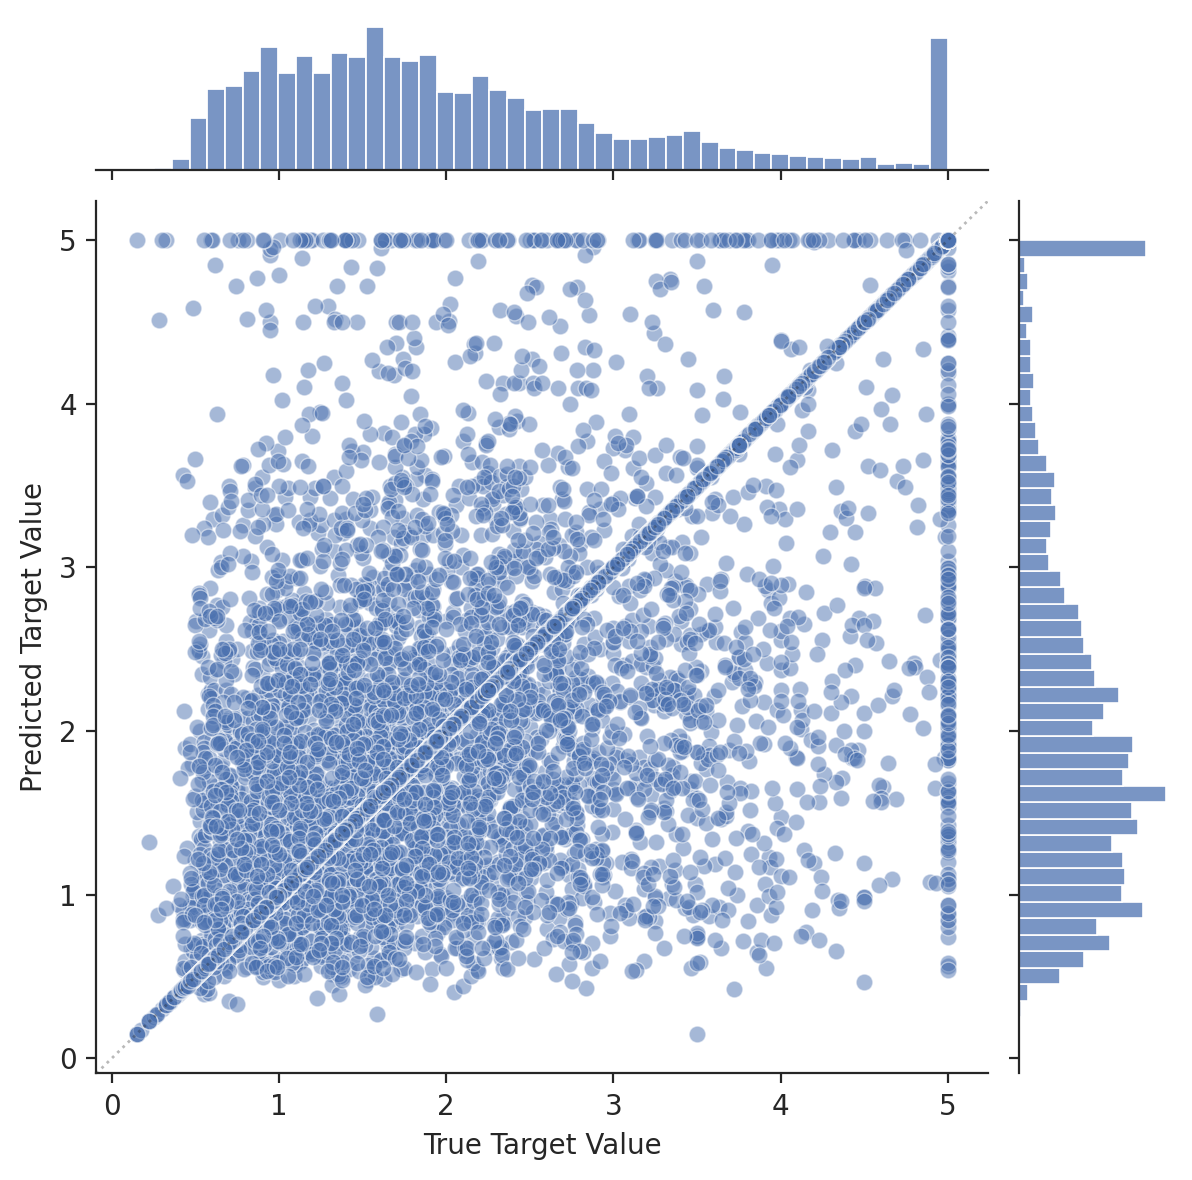

In [114]:

plot_actual_vs_predicted_joint(knnr, X, y);